# Financial Derivatives Homework 3
In this assignment, you will have to answer questions by adding codes or markdowns in the cells provided.

### Question 1: simulate price path using the geometric Brownian motion [20 points]

The logarithm stock price under the geometric Brownian motion is given by:

$ S_{t} = S_{0}e^{(\mu - \frac{1}{2}\sigma^{2})t + \sigma{\epsilon\sqrt{t}}} $

where $\epsilon \sim \mathcal{N}(0,1)$.

Using the following parameters:

$ \mu = 0.1 $

$ N = 100 $

$ T = 10 $

$ dt = 10/100 = 0.1 $

$ S_0 = 100 $

**Simulate** price paths for $\sigma = 0, \sigma = 0.1, \sigma = 0.2$ using a random seed of 5 and *plot them on a diagram.

#### Answer in the box below:

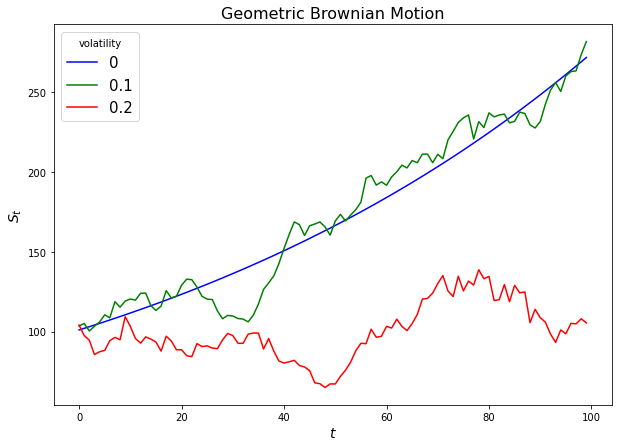

In [15]:
#Define parameters
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#define parameters
mu = 0.1
N = 100
T = 10
S_0 = 100
dt = T/N
sigma = [0,0.1,0.2]

#set seed
np.random.seed(5)

#initialize empty data frame
S = pd.DataFrame()

#run simulations for each sigma and store simulation for each sigma in a different column of the df
for i in range(len(sigma)):
    
    e = np.random.normal(0,1,N)
    drift = (mu - 0.5 * sigma[i] ** 2) * dt
    shocks = sigma[i] * e * m.sqrt(dt)
    S[str(sigma[i])] = S_0 * np.exp((drift + shocks).cumsum())

#set line colors
colors = ['blue', 'green', 'red']

#define plot and parameters
plt.figure(figsize = (10,7))
plt.gca().set_prop_cycle(color = colors)
plt.plot(S)
plt.ylabel('$S_t$', size = 14)
plt.xlabel('$t$', size = 14)
plt.title("Geometric Brownian Motion", size = 16)
plt.legend(labels= S.columns,  prop={'size': 15}, title = "volatility")

#show plot
plt.show()

You should replicate the diagram below:
<img src="gbm.png">

### Question 2: applying the Itô's lemma [20 points]

Given the following Itô process:

$ dX_{t} = dW_{t} $ 

Apply the **Itô's lemma** to the following function:

$ f(X) = e^{2X} $


#### Answer in the box below:

Using Ito's Lemma, we know the following: 

For a stochastic Process $dX_t = \mu(X,t)dt + \sigma(X,t)dW_t$ and any function $f(X,t)$ which has well defined first and second order derivatives with respect to $X$ and $t$, we can get $df$ as: 

$df(X,t) = \big[f_t + \mu(X,t)f_X + \frac{1}{2}\sigma(X,t)^2f_{XX}\big]dt + \sigma(X,t)f_X dW_t$

Thus, for $f(X,t) = e^{2X}$ and $dX = dW_t \implies \mu = 0, \sigma = 1$  we get: 

- $f_t = 0$
- $f_X = 2e^{2X}$
- $f_{XX} = 4e^{2X}$

$\implies df(X,t) = \big[0 + 0*2e^{2X} + \frac{1}{2}  1^2 * 4e^{2X}\big]dt + 1*2e^{2X}dW_t$

We simplify and receive: 
$2e^{2x}dt + 2e^{2x}dW_t = 2e^{2x}(dt + dW_t)$ 


### Question 3: applying the Itô's product rule [20 points]

Given the following three Itô processes for asset $X$, asset $Y$, and asset $Z$ respectively:

$ dX_{t} = \mu_{x}X_{t}dt + \sigma_{x}X_{t}dW^{x}_{t} $

$ dY_{t} = \mu_{y}Y_{t}dt + \sigma_{y}Y_{t}dW^{y}_{t} $

$ dZ_{t} = \mu_{z}Z_{t}dt + \sigma_{z}Z_{t}dW^{z}_{t} $

where $ dW^{x}_{t} $,  $ dW^{y}_{t} $, and $ dW^{z}_{t} $ are Brownian motions for asset $X$, asset $Y$, and asset $Z$ respectively with correlations $ \rho_{x,y} $ between $X$ and $Y$,  $ \rho_{x,z} $ between $X$ and $Z$, and $ \rho_{y,z} $ between $Y$ and $Z$.

Find the **differential** for the following function:

$ f(X,Y,Z) = X_{t}(Y_{t} + Z_{t}) $

#### Answer in the box below:

Ito's Sum Rule: 
- $d(X+Y) = dX + dY$

Ito's Product Rule: 
- $d(XY) = XdY + YdX + dXdY$

Combining the two rules we get: 

$d(X(Y+Z)) = Xd(Y + Z) + (Y+Z)dX + d(Y + Z)dX = X(dY + dZ) + (Y+Z)dX + (dY + dZ)dX$  

Substituting $dX, dY$ and $dZ$ for the values as defined above we receive: 

$XY(\mu_ydt + \sigma_y W_{y,t}) + XZ(\mu_z dt + \sigma_z W_{z,t}) + XY(\mu_x dt + \sigma_x W_{x,t})+ XZ(\mu_x dt + \sigma_x W_{x,t}) + XY(\mu_x dt + \sigma_x W_{x,t})(\mu_y dt + \sigma_y W_{y,t}) + XZ(\mu_x dt + \sigma_x W_{x,t})(\mu_z dt + \sigma_z W_{z,t}) $


given that $dt^2 = dtdW_t = 0$ and  $dW_{a,t} dW_{b,t} =\rho_{a,b}dt$ we simplify and receive: 


$XY(\mu_xdt + \sigma_x W_{x,t} + \mu_y dt + \sigma_y W_{y,t} + \sigma_x\sigma_y \rho_{x,y}dt) + XZ(\mu_xdt + \sigma_x W_{x,t} + \mu_z dt + \sigma_z W_{z,t} + \sigma_x\sigma_z\rho_{x,z}dt)$

We ultimately factor out $dt$ and get: 

$XY\big[(\mu_x + \mu_y + \sigma_x\sigma_y\rho_{x,y})dt + \sigma_x W_{x,t} + \sigma_y W_{y,t}\big] + XZ\big[(\mu_x + \mu_z + \sigma_x\sigma_z\rho_{x,z})dt + \sigma_x W_{x,t} + \sigma_z W_{z,t}\big]$ 

### Question 4: change of measure [20 points]

Given the following geometric Brownian motion with a risk-neutral drift term:

$ dS_{t} = rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} $

a) Show that under measure $\mathbb{M}$, we can re-express the above dynamics into a **stochastic process with no drift**:

$ dS_{t} =\sigma{S}_{t}dW^{\mathbb{M}}_{t} $

b) Find the **Radon-Nikodym derivative** for changing the measure from $\mathbb{Q}$ to $\mathbb{M}$.

## a)

Under the risk neutral drift, we have: 

$ dS_{t} = rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} $

Therefore, under the change of measure without drift, we must have: 

$ dS_{t} =\sigma{S}_{t}dW^{\mathbb{M}}_{t} $

This implies that: 

$rS_{t}dt + \sigma{S}_{t}dW^{\mathbb{Q}}_{t} = \sigma{S}_{t}dW^{\mathbb{M}}_{t}$

By simplification, we thus receive: 

$dW^{\mathbb{M}}_{t} = (\frac{r}{\sigma})dt + dW^{\mathbb{Q}}_t$

## b)

under the Measure $\mathbb{M}$, the Brownian Motion is normally distributed with a mean of 0 and a variance of t

$W_t^{\mathbb{M}} \text{~} \mathcal{N}[0,t]$

Further, from a) we know that

$dW^{\mathbb{M}}_{t} = (\frac{r}{\sigma})dt + dW^{\mathbb{Q}}_t$

By integration, we get

$\int dW^{\mathbb{M}}_{t} = \int (\frac{r}{\sigma})dt + \int dW^{\mathbb{Q}}_t$

which yields 

$W^{\mathbb{M}}_{t} = (\frac{r}{\sigma})t + W^{\mathbb{Q}}_t$

Thus, in order for the Brownian Motion to be normally distributed with a mean of 0 under $\mathbb{M}$, the mean of $W^{\mathbb{Q}}_t$ must be adjusted downwards by $-(\frac{r}{\sigma})t$

Thus: $W_t^{\mathbb{Q}} \text{~} \mathcal{N}^\mathbb{M}[-(\frac{r}{\sigma})t,t]$

Meaning that if we transfer the normally disrtibuted Brownian Motion under the $\mathbb{Q}$ measure to the $\mathbb{M}$ measure, it does not have a mean of 0 anymore but a mean of $-(\frac{r}{\sigma})t$.

Further, setting $-(\frac{r}{\sigma})t = \kappa t$ we have: 

The PDF of $W_t^\mathbb{Q}$ under $\mathbb{Q}$ is (ie. $d\mathbb{Q})$ : 

$\frac{1}{\sqrt{2t\pi}}exp\bigg[-\frac{1}{2}\big(\frac{W_t^{\mathbb{Q}}}{\sqrt t}\big)^2\bigg]\tag1$

The PDF of $W_t^\mathbb{Q}$ under  $\mathbb{M}$ is (ie. $d\mathbb{M})$:

$\frac{1}{\sqrt{2t\pi}}exp\bigg[-\frac{1}{2}\big(\frac{W_t^{\mathbb{Q}} - \kappa t}{\sqrt t}\big)^2\bigg]\tag2$

The Radon Nikodym Derivative $\mathbb{Z}(t)$ is defined as $\frac{d\mathbb{M}(t)}{d\mathbb{Q}(t)}$

Thus, dividing $2$ by $1$ we get the Radon Nikodym Derivative

$\mathbb{Z}(t) = exp\big[\kappa W_t^{\mathbb{Q}} - \frac{1}{2} \kappa ^2 t\big]\tag3$



### Question 5: Black-Scholes-Merton Model [20 points]

Write the **Python function** for pricing European call options and European put options under the **Black-Scholes-Merton model**:

$C_{t} = S\mathcal{N}(d_1) - K\exp^{-rt}\mathcal{N}(d_2)$

$P_{t} = K\exp^{-rt}\mathcal{N}(-d_2) - S\mathcal{N}(-d_1)$ 

$d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{1}{2}\sigma^2)t}{\sigma\sqrt{t}}$

$d_2 = d_1 - \sigma\sqrt{t}$

Using the following parameters:

$ \sigma = 0.3 $

$ r = 0.01 $

$ T = 0.5 $

$ S_0 = 50 $

$ K = 45 $

**Compute** the price of an **European call option** and an **European put option** respectively:

#### Answer in the box below:

In [16]:
from scipy import stats

#define input parameters
r = 0.01
T = 0.5 
S_0 = 50
K = 45
vol = 0.3

#function for calculating European Call Price under Black and Scholes
def BSEuroCall(r,T,S_0,K,vol):
    
    #calculate d1 & d2
    d_1 = (m.log(S_0/K) + (r + 0.5*vol**2)*T) / (vol * m.sqrt(T))
    d_2 = d_1 - (vol * m.sqrt(T))
    
    #Caluclate Option Price
    C = S_0 * stats.norm(0,1).cdf(d_1) - K * m.exp(-r*T) * stats.norm(0,1).cdf(d_2)
    
    #function output
    return C

def BSEuroPut(r,T,S_0,K,vol):
    
    #calculate d1 & d2
    d_1 = (m.log(S_0/K) + (r + 0.5*vol**2)*T) / (vol * m.sqrt(T))
    d_2 = d_1 - (vol * m.sqrt(T))
    
    #Caluclate Option Price
    C = K* m.exp(-r*T) * stats.norm(0,1).cdf(-d_2) - S_0 * stats.norm(0,1).cdf(-d_1)
    
    #function output
    return C 


#Output:
Call = BSEuroCall(r,T,S_0,K,vol)
Put = BSEuroPut(r,T,S_0,K,vol)

print("European Call price:" + "\n\n"  + str(Call) + "\n\n" + "European Put price:" "\n\n" + str(Put))


European Call price:

7.142214622710341

European Put price:

1.917776186381051


Your answer should look like:

European call price:

7.142214622710341

European put price:

1.917776186381051